# What Is the Top Complaint Type?
The goal of this exercise is to find the answer to the Question 1 of the problem statement:

### Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

In this exercise, you need to read back the 311 datasets that you stored in Cloud Object Store and explore the dataset.

By the end of this exercise, you need to figure out the correct Complaint Type that the Department of Housing Preservation and Development of New York City should focus on.

Add the answer to this question along with code and comments in a notebook. Upload the notebook in the subsection called "Question 1 - Which type of complaints The Department of Housing Preservation and Development of New York City should focus first?"  in the section "Submit your work and Review your Peer's work' in module 'Submit Your Work and Grade Your Peers".

In [1]:
%%capture
!pip install pandas

In [2]:
import pandas as pd
import numpy as np

In [3]:
NY_311 = pd.read_csv("fhrw-4uyv.csv", parse_dates=['created_date', "closed_date"], infer_datetime_format=True)

In [11]:
NY_311_sample = NY_311.sample(100000)

In [12]:
NY_311_sample.head()

created_date  unique_key  complaint_type  incident_zip  \
3412487 2015-04-10 00:00:00    30370993  HEAT/HOT WATER       10023.0   
161916  2010-01-17 00:00:00    15750486         HEATING       11228.0   
5671802 2019-02-25 18:48:06    41806353  HEAT/HOT WATER       11214.0   
3912735 2016-02-14 19:48:08    32682759  HEAT/HOT WATER       10457.0   
1464473 2012-01-08 00:00:00    22476420         HEATING       10467.0   

                incident_address         street_name address_type      city  \
3412487     160 WEST   73 STREET    WEST   73 STREET      ADDRESS  NEW YORK   
161916            1417 76 STREET           76 STREET      ADDRESS  BROOKLYN   
5671802           8800 20 AVENUE           20 AVENUE      ADDRESS  BROOKLYN   
3912735  2080 LA FONTAINE AVENUE  LA FONTAINE AVENUE      ADDRESS     BRONX   
1464473       3230 CRUGER AVENUE       CRUGER AVENUE      ADDRESS     BRONX   

                                    resolution_description      borough  \
3412487  The complaint you filed is a duplicate of a co...    MANHATTAN   
161916   The Department of Housing Preservation and Dev...  Unspecified   
5671802  The Department of Housing Preservation and Dev...     BROOKLYN   
3912735  The complaint you filed is a duplicate of a co...        BRONX   
1464473  More than one complaint was received for this ...        BRONX   

          latitude  longitude         closed_date         location_type  \
3412487  40.778780 -73.979942 2015-04-14 00:00:00  RESIDENTIAL BUILDING   
161916   40.618023 -74.005266 2010-01-21 00:00:00  RESIDENTIAL BUILDING   
5671802  40.600665 -74.002355 2019-02-26 17:50:09  RESIDENTIAL BUILDING   
3912735  40.849351 -73.892615 2016-02-18 09:54:05  RESIDENTIAL BUILDING   
1464473  40.872255 -73.866129 2012-01-10 00:00:00  RESIDENTIAL BUILDING   

         status  
3412487  Closed  
161916   Closed  
5671802  Closed  
3912735  Closed  
1464473  Closed

## Week Aggregated plot shows how categories change over time, between 2014 and 2015

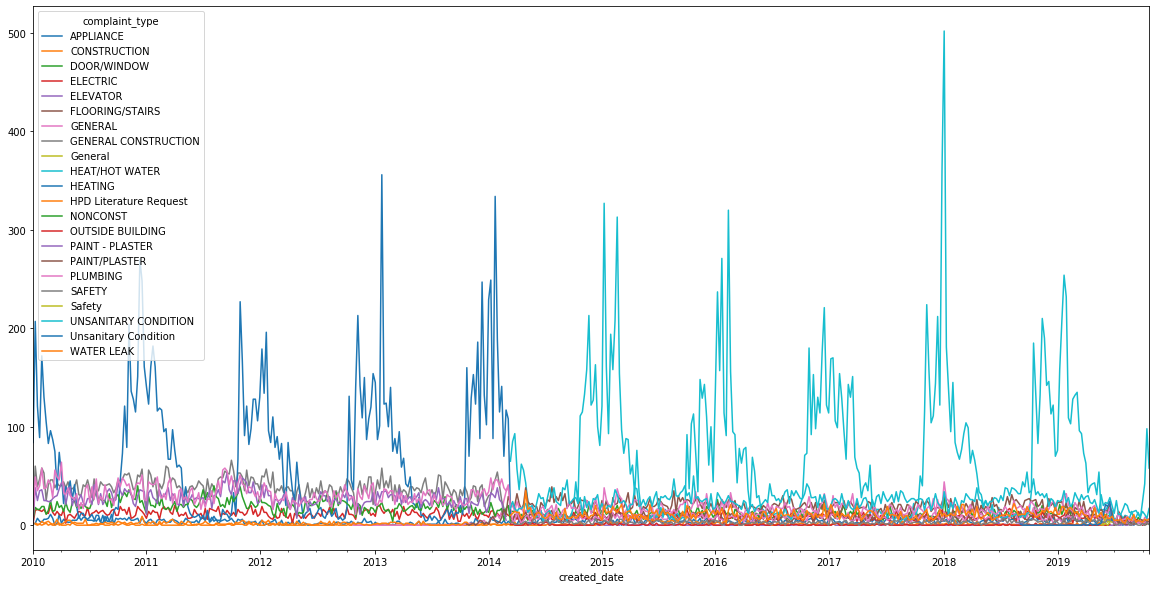

In [14]:
%matplotlib inline

NY_311_sample[["complaint_type","created_date"]].groupby("complaint_type").resample("1W", on="created_date").count().unstack(level=0).complaint_type.plot(figsize=(20,10))

In [15]:
NY_311.complaint_type.value_counts()

HEAT/HOT WATER            1166192
HEATING                    887869
PLUMBING                   705180
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       442253
PAINT - PLASTER            361258
PAINT/PLASTER              342754
ELECTRIC                   304699
NONCONST                   260890
DOOR/WINDOW                201615
WATER LEAK                 189844
GENERAL                    148008
FLOORING/STAIRS            136002
APPLIANCE                  110768
HPD Literature Request      52830
SAFETY                      50558
OUTSIDE BUILDING             7070
ELEVATOR                     6548
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold          

## Rename with help of `.map()` - or - `replace()`

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict


In [16]:
rename_dict = { "HEATING" : "HEAT/HOT WATER", "PAINT/PLASTER" : "PAINT - PLASTER", 
               "General" : "GENERAL", "Mold" : "GENERAL", "Electric" : "ELECTRIC",
              "Unsanitary Condition" : "UNSANITARY CONDITION", "Safety" : "SAFETY",
              "Plumbing" : "PLUMBING", "Outside Building" : "OUTSIDE BUILDING",
              "Appliance" : "APPLIANCE"}

In [18]:
#NY_311.complaint_type = NY_311.complaint_type.map(rename_dict).fillna(NY_311.complaint_type)

NY_311_merged = NY_311.copy()
NY_311_merged.complaint_type = NY_311.complaint_type.replace(rename_dict)

In [19]:
NY_311_merged.complaint_type.value_counts()

HEAT/HOT WATER            2054061
PLUMBING                   705191
PAINT - PLASTER            704012
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       447752
ELECTRIC                   304700
NONCONST                   260890
DOOR/WINDOW                201615
WATER LEAK                 189844
GENERAL                    149172
FLOORING/STAIRS            136002
APPLIANCE                  110772
HPD Literature Request      52830
SAFETY                      50982
OUTSIDE BUILDING             7076
ELEVATOR                     6548
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

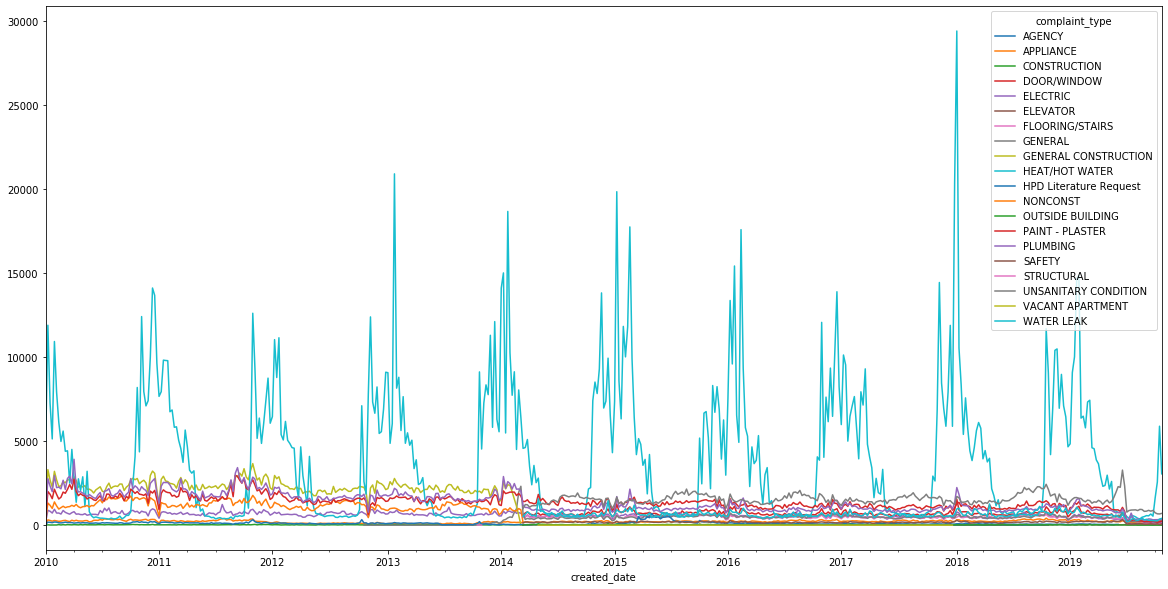

In [21]:
%matplotlib inline

NY_311_merged[["complaint_type","created_date"]].groupby("complaint_type").resample("1W", on="created_date").count().unstack(level=0).complaint_type.plot(figsize=(20,10))

In [23]:
%%capture
!pip install missingno

In [24]:
NY_311_sample.index = NY_311_sample.created_date

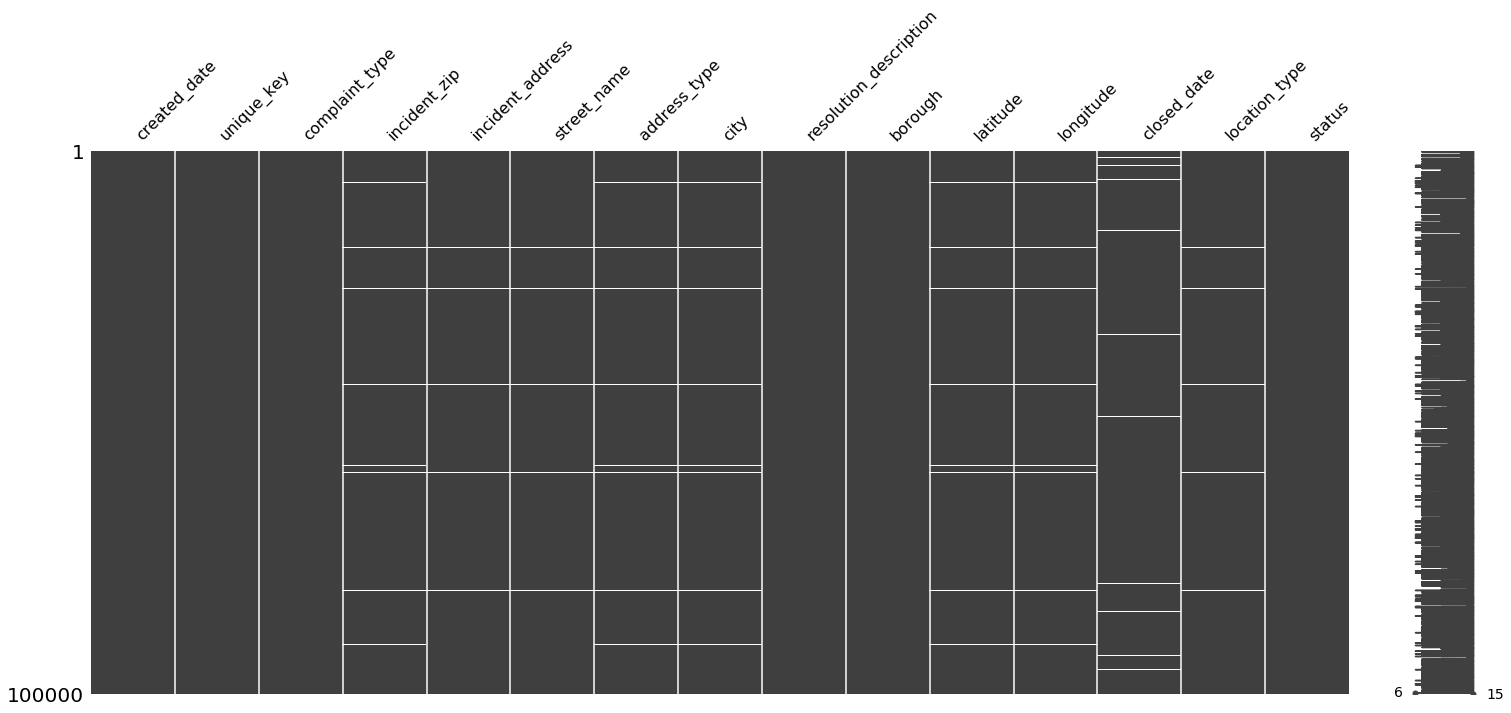

In [25]:
%matplotlib inline

import missingno as msno
msno.matrix(NY_311_sample)

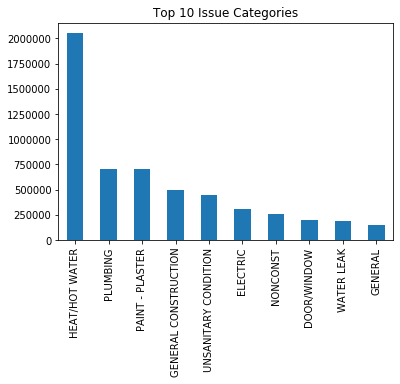

In [27]:
%matplotlib inline

NY_311_merged.complaint_type.value_counts().head(10).plot(kind='bar',title="Top 10 Issue Categories")

## COMMENTS

Clearly, heat related problems are dominating by numbers, my first guess would be to focus on those.


In [28]:
import numpy as np

def count_open( status_array ):
    return np.sum( status_array == "Open" )

counts_for_barplot = NY_311_merged.groupby("complaint_type").agg({"status" : [count_open,"count"] })

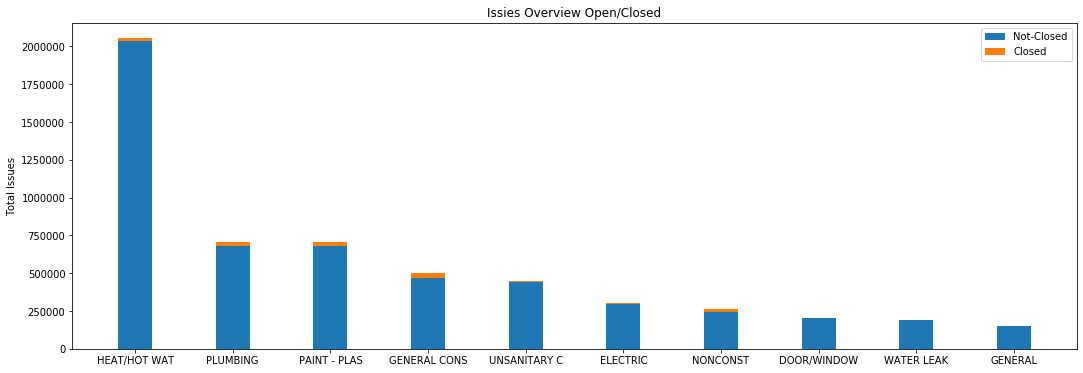

In [29]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

top_few_df = counts_for_barplot.status.sort_values("count", ascending=False).head(10)

plt.figure(figsize=(18,6))
N = len(top_few_df)
closed_count = top_few_df["count"] - top_few_df["count_open"]
open_count = top_few_df["count_open"]

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, closed_count, width)
p2 = plt.bar(ind, open_count, width, bottom=closed_count)

plt.ylabel('Total Issues')
plt.title('Issies Overview Open/Closed')
plt.xticks(ind, [ l[:12] for l in top_few_df.index ])
plt.legend((p1[0], p2[0]), ('Not-Closed', 'Closed'))

plt.show()

## COMMENTS

There is not a clear type of problem with significant number of open status. Still I remain to focus on heat related problems

In [30]:
issue_duration = NY_311_merged[ ~pd.isnull( NY_311_merged.closed_date ) ]

In [31]:
issue_duration["duration_length"] = issue_duration.closed_date - issue_duration.created_date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
def median_length_in_hours(duration_array):
    return np.median(duration_array.dt.seconds) / (60*60)

counts_for_barplot = issue_duration.groupby("complaint_type").agg({"duration_length" : [median_length_in_hours] })

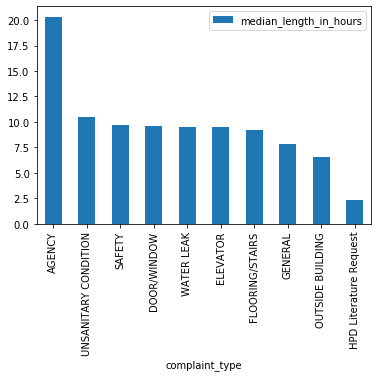

In [33]:
%matplotlib inline

counts_for_barplot.duration_length.sort_values("median_length_in_hours", ascending=False ).head(10).plot(kind='bar')

## COMMENTS

- Focus on heat related problems, as they dominate by numbers
- No clear problem type with significant amount with status on `open`
- No clear problem type with significant longer time to solve
- All analysis shows to focus on heat related problems